In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

pd.set_option('display.width', None)
pd.set_option('display.max_columns', None) 

%load_ext autoreload
%autoreload 2
import logging
logging.basicConfig(level=logging.INFO)

# Goal of the project

Verduurzaming van woningen is een thema dat sinds het akkoord op de energietransitite ontzettend belangrijk is geworden. Alle energieleveranciers leveren tegenwoordig meer duurzamere oplossingen aan hun klanten. Het bedrijf EC-Energy is een van deze bedrijven. EC-Energy biedt haar klanten de volgende verschillende producten aan gericht op een meer duurzame inrichting van huizen:

- Duurzaam opgewekte elektra-pakketten - € 880,00 jaarcontract voor 2-persoons huishouden (berekend op 2500 kwh)
- Groen gas & duurzaam opgewekte elektra-pakketten - € 1402,33 jaarcontract voor 2-persoons huishouden (berekend op 2500 kwh, 1100 m3 gas)
- Zonnepanelen - € 470,00 installatiekosten voor 1 zonnepaneel 
- Laadpalen - € 1162,00 installatiekosten voor 1 laadpaal

EC-Energy heeft zich als organisatie voorgenomen slimmer te werken en wil daarom haar salesstrategie meer persoonlijk inrichten. Zo kunnen zij op de beste manier het meeste omzet genereren en blijven ze voorlopen op hun concurrenten. Als data scientist is het jouw uitdaging om te laten zien hoe data hier het verschil kan maken. 

Als startpunt krijg je 3 datasets van het Centraal Bureau voor Statistiek (CBS) met demografische gegevens over wijken in Nederland en gegevens over de soorten woningen en het energieverbruik. Gebruik deze data om EC-Energy een advies te geven over hoe zij data kunnen inzetten om de omzet te maximaliseren. Bijvoorbeeld: waar en waarom is het een goed idee om verkopers van bepaalde producten ergens heen te sturen? EC-Energy heeft de vraag uitgezet onder meerdere data scientists en is op zoek naar een creatieve oplossing!

In deze opdracht willen we zien dat:
je in staat bent om inzichten uit de data te halen;
je verplaatst in de schoenen van EC-Energy;
laat zien hoe zij een praktisch voordeel kunnen halen met jouw analyse;
gebruik maakt van een groot deel van het data-scala (data-engineering, -science, -analytics en -visuals).

# Approach: unsupervised customer segmentation

### What is Customer Segmentation?
Customer segmentation is the process of dividing customers into groups based on common characteristics so companies can market to each group more effectively. The goal of segmenting customers is to decide how to relate to customers in each segment in order to maximize the value of each customer to the business.

### Why Segment Customers?
Customer segmentation has the potential to allow companies to address each customer in the most effective way.
Segmentation helps a company to create and communicate targeted marketing startegy that will resonate with specific groups of customers, which improve customer service and establish better customer relationships.

### How to Segment Customers?
Customer segmentation requires a company to gather specific information – data – about customers and analyze it to identify patterns that can be used to create segments.

-----

# Exploratory Data Analysis

In [2]:
df_1 = pd.read_csv('../data/data_1.csv')
df_2 = pd.read_csv('../data/data_2.csv')
df_3 = pd.read_csv('../data/data_3.csv')

In [3]:
df_1.head()

,Unnamed: 0,gemeentenaam,soort_regio,id,codering,aantal_inwoners,woningkenmerken,stadsverwarming
0,9503,LoonopZand,Buurt,96,BU08093091,222.0,T001100ZW25810ZW25805ZW25806ZW10300ZW103201014...,0.0
1,4063,Dordrecht,Buurt,67,BU05050202,1046.0,T001100ZW25810ZW25805ZW25806ZW10300ZW103201014...,0.0
2,2473,hetBildt,Wijk,96,WK006301,-1677.0,T001100ZW25810ZW25805ZW25806ZW10300ZW103201014...,0.0
3,11554,Oudewater,Buurt,42,BU05890208,134.0,T001100ZW25810ZW25805ZW25806ZW10300ZW103201014...,0.0
4,6943,Heerlen,Buurt,16,BU09173201,340.0,T001100ZW25810ZW25805ZW25806ZW10300ZW103201014...,0.0


In [4]:
df_1.shape

(16766, 8)

In [5]:
df_2.head()

,Unnamed: 0,gemeentenaam,mannen,vrouwen,k_0_tot_15_jaar,k_15_tot_25_jaar,k_25_tot_45_jaar,k_45_tot_65_jaar,k_65_jaar_of_ouder,codering,huishoudens_totaal,eenpersoonshuishoudens,huishoudens_zonder_kinderen,huishoudens_met_kinderen,gemiddelde_huishoudensgrootte,bevolkingsdichtheid,woningvoorraad,gemiddelde_woningwaarde,koopwoningen,huurwoningen_totaal,in_bezit_woningcorporatie,in_bezit_overige_verhuurders,eigendom_onbekend,bouwjaar_voor_2000,bouwjaar_vanaf_2000,gemiddeld_elektriciteitsverbruik_totaal,elect_appartement,elect_tussenwoning,elect_hoekwoning,elect_twee_onder_een_kap_woning,elect_vrijstaande_woning,elect_huurwoning,elect_eigen_woning,gemiddeld_aardgasverbruik_totaal,aard_appartement,aard_tussenwoning,aard_hoekwoning,aard_twee_onder_een_kap_woning,aard_vrijstaande_woning,aard_huurwoning,aard_eigen_woning,percentage_woningen_met_stadsverwarming,aantal_inkomensontvangers,gemiddeld_inkomen_per_inkomensontvanger,gemiddeld_inkomen_per_inwoner,k_40_huishoudens_met_laagste_inkomen,k_20_huishoudens_met_hoogste_inkomen,personen_per_soort_uitkering_bijstand,personenautos_brandstof_benzine,personenautos_overige_brandstof,oppervlakte_land,mate_van_stedelijkheid,omgevingsadressendichtheid,bedrijfsvestigingen_totaal,type_a_landbouw_bosbouw_visserij,type_bf_nijverheid_energie,type_gi_handel_horeca,type_hj_vervoer_informatie_communicatie,type_kl_financiele_diensten_onroerendgoed,type_mn_zakelijke_dienstverlening,type_ru_cultuur_recreatie_overige_diensten
0,9503,LoonopZand,110.0,110.0,35.0,30.0,40.0,70.0,45.0,BU08093091,80.0,15.0,35.0,35.0,26.0,26.0,92.0,425.0,90.0,8.0,0.0,8.0,2.0,74.0,26.0,4680.0,NaN,1900.0,NaN,4000.0,5420.0,NaN,4550.0,2350.0,NaN,910.0,NaN,1630.0,2860.0,NaN,2190.0,NaN,200.0,NaN,NaN,NaN,NaN,0.0,90.0,35.0,856.0,5.0,235.0,35.0,10.0,5.0,10.0,0.0,5.0,5.0,0.0
1,4063,Dordrecht,535.0,505.0,200.0,155.0,285.0,290.0,115.0,BU05050202,450.0,175.0,95.0,190.0,23.0,5979.0,437.0,131.0,24.0,76.0,71.0,5.0,0.0,91.0,9.0,2470.0,2050.0,3080.0,2940.0,NaN,NaN,2220.0,3280.0,840.0,720.0,970.0,980.0,NaN,NaN,790.0,980.0,NaN,800.0,NaN,NaN,607.0,76.0,110.0,235.0,70.0,17.0,1.0,2972.0,50.0,0.0,5.0,10.0,10.0,5.0,5.0,15.0
2,2473,hetBildt,885.0,790.0,290.0,205.0,365.0,560.0,255.0,WK006301,725.0,240.0,225.0,260.0,23.0,59.0,750.0,139.0,76.0,23.0,15.0,8.0,1.0,94.0,6.0,2690.0,NaN,1950.0,2380.0,2540.0,2930.0,1990.0,2900.0,1600.0,NaN,1300.0,1390.0,1420.0,1770.0,1330.0,1690.0,NaN,1300.0,NaN,NaN,363.0,163.0,30.0,640.0,240.0,-2843.0,5.0,80.0,180.0,40.0,30.0,35.0,15.0,10.0,35.0,25.0
3,11554,Oudewater,70.0,60.0,25.0,20.0,25.0,50.0,10.0,BU05890208,45.0,10.0,15.0,25.0,30.0,436.0,49.0,NaN,84.0,14.0,0.0,14.0,2.0,61.0,39.0,5120.0,NaN,NaN,NaN,5030.0,5450.0,NaN,4830.0,2210.0,NaN,NaN,NaN,2270.0,2410.0,NaN,2050.0,NaN,100.0,NaN,NaN,NaN,NaN,0.0,90.0,85.0,31.0,4.0,535.0,120.0,0.0,40.0,45.0,10.0,20.0,5.0,0.0
4,6943,Heerlen,150.0,185.0,20.0,25.0,55.0,90.0,140.0,BU09173201,255.0,195.0,35.0,25.0,13.0,1542.0,271.0,81.0,11.0,66.0,30.0,37.0,23.0,100.0,0.0,2040.0,1840.0,2490.0,2210.0,NaN,NaN,2120.0,1940.0,930.0,850.0,1050.0,1600.0,NaN,NaN,960.0,930.0,NaN,300.0,NaN,NaN,879.0,0.0,30.0,90.0,5.0,22.0,2.0,1763.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
df_2.shape

(16766, 61)

In [7]:
df_3.head()

,Unnamed: 0,id_old,gemeentenaam,codering,indelingswijziging_wijken_en_buurten,aantal_installaties_bij_woningen,aantal_zonnepanelen_per_installatie,opgesteld_vermogen_van_zonnepanelen,totaal_aantal_laadpalen,werkloosheidsuitkering_relatief,bijstandsuitkering_relatief,arbeidsongeschiktheidsuitkering_relatief,aow_uitkering_relatief,inwoners_vanaf_15_jaar,inwoners_vanaf_15_jr_tot_aow_leeftijd,inwoners_vanaf_de_aow_leeftijd
0,9503,1004,LoonopZand,BU08093091,1.0,10.0,26.0,60.0,0.0,90.0,20.0,155.0,930.0,800.0,630.0,200.0
1,4063,1006,Dordrecht,BU05050202,1.0,NaN,NaN,NaN,0.0,90.0,485.0,455.0,520.0,3380.0,2950.0,440.0
2,2473,1000,hetBildt,WK006301,1.0,70.0,18.0,278.0,2.0,125.0,80.0,185.0,710.0,5570.0,4560.0,1000.0
3,11554,1008,Oudewater,BU05890208,1.0,6.0,11.0,14.0,1.0,10.0,0.0,40.0,375.0,440.0,400.0,40.0
4,6943,1008,Heerlen,BU09173201,1.0,NaN,NaN,NaN,0.0,55.0,445.0,445.0,1690.0,1280.0,740.0,540.0


In [8]:
df_3.shape

(16766, 16)

### Merge dataframes

In [9]:
df_1['gemeentenaam'].nunique()

388

We cannot merge on 'gemeentenaam' since there are only 388 unique values.

In [10]:
df_1.loc[lambda d: d['gemeentenaam'] == 'Dordrecht']

,Unnamed: 0,gemeentenaam,soort_regio,id,codering,aantal_inwoners,woningkenmerken,stadsverwarming
1,4063,Dordrecht,Buurt,67,BU05050202,1046.0,T001100ZW25810ZW25805ZW25806ZW10300ZW103201014...,0.0
105,4109,Dordrecht,Buurt,90,BU05050701,1429.0,T001100ZW25810ZW25805ZW25806ZW10300ZW103201014...,0.0
201,4084,Dordrecht,Buurt,48,BU05050406,57.0,T001100ZW25810ZW25805ZW25806ZW10300ZW103201014...,0.0
495,4149,Dordrecht,Buurt,25,BU05051101,2355.0,T001100ZW25810ZW25805ZW25806ZW10300ZW103201014...,0.0
522,4097,Dordrecht,Wijk,41,WK050506,5372.0,T001100ZW25810ZW25805ZW25806ZW10300ZW103201014...,0.0
...,...,...,...,...,...,...,...,...
16169,4078,Dordrecht,Buurt,37,BU05050400,-1735.0,T001100ZW25810ZW25805ZW25806ZW10300ZW103201014...,0.0
16310,4047,Dordrecht,Buurt,60,BU05050102,544.0,T001100ZW25810ZW25805ZW25806ZW10300ZW103201014...,0.0
16363,4043,Dordrecht,Gemeente,27,GM0505,118731.0,T001100ZW25810ZW25805ZW25806ZW10300ZW103201014...,0.0
16435,4122,Dordrecht,Buurt,34,BU05050901,4056.0,T001100ZW25810ZW25805ZW25806ZW10300ZW103201014...,0.0


In [11]:
df_1['codering'].nunique()

16666

In [12]:
df_1[df_1.duplicated(subset=['codering'])]

,Unnamed: 0,gemeentenaam,soort_regio,id,codering,aantal_inwoners,woningkenmerken,stadsverwarming
1509,12,AaenHunze,Buurt,52,BU16800309,12.0,T001100ZW25810ZW25805ZW25806ZW10300ZW103201014...,0.0
3378,9442,Lochem,Wijk,3,WK026202,4166.0,T001100ZW25810ZW25805ZW25806ZW10300ZW103201014...,0.0
3842,4542,Eemsmond,Buurt,89,BU16510009,96.0,T001100ZW25810ZW25805ZW25806ZW10300ZW103201014...,0.0
3846,6022,Groningen,Buurt,38,BU00140602,660.0,T001100ZW25810ZW25805ZW25806ZW10300ZW103201014...,0.0
5225,561,AlphenaandenRijn,Buurt,36,BU04847004,597.0,T001100ZW25810ZW25805ZW25806ZW10300ZW103201014...,0.0
...,...,...,...,...,...,...,...,...
16516,14799,Venray,Wijk,39,WK098402,2276.0,T001100ZW25810ZW25805ZW25806ZW10300ZW103201014...,0.0
16570,9206,Leudal,Gemeente,83,GM1640,35878.0,T001100ZW25810ZW25805ZW25806ZW10300ZW103201014...,0.0
16621,10268,Montferland,Buurt,16,BU19550101,958.0,T001100ZW25810ZW25805ZW25806ZW10300ZW103201014...,0.0
16662,13592,Teylingen,Wijk,72,WK152502,4797.0,T001100ZW25810ZW25805ZW25806ZW10300ZW103201014...,0.0


100 rows are duplicated. Therefore we need to drop them.

In [13]:
df_1 = df_1.drop_duplicates(subset=['codering'])
df_2 = df_2.drop_duplicates(subset=['codering'])
df_3 = df_3.drop_duplicates(subset=['codering'])

In [14]:
from functools import reduce

In [15]:
dfs = [df_1, df_2, df_3]

In [16]:
df = reduce(lambda left,right: pd.merge(left,right,on=['codering', 'Unnamed: 0', 'gemeentenaam']), dfs)

In [17]:
df

,Unnamed: 0,gemeentenaam,soort_regio,id,codering,aantal_inwoners,woningkenmerken,stadsverwarming,mannen,vrouwen,k_0_tot_15_jaar,k_15_tot_25_jaar,k_25_tot_45_jaar,k_45_tot_65_jaar,k_65_jaar_of_ouder,huishoudens_totaal,eenpersoonshuishoudens,huishoudens_zonder_kinderen,huishoudens_met_kinderen,gemiddelde_huishoudensgrootte,bevolkingsdichtheid,woningvoorraad,gemiddelde_woningwaarde,koopwoningen,huurwoningen_totaal,in_bezit_woningcorporatie,in_bezit_overige_verhuurders,eigendom_onbekend,bouwjaar_voor_2000,bouwjaar_vanaf_2000,gemiddeld_elektriciteitsverbruik_totaal,elect_appartement,elect_tussenwoning,elect_hoekwoning,elect_twee_onder_een_kap_woning,elect_vrijstaande_woning,elect_huurwoning,elect_eigen_woning,gemiddeld_aardgasverbruik_totaal,aard_appartement,aard_tussenwoning,aard_hoekwoning,aard_twee_onder_een_kap_woning,aard_vrijstaande_woning,aard_huurwoning,aard_eigen_woning,percentage_woningen_met_stadsverwarming,aantal_inkomensontvangers,gemiddeld_inkomen_per_inkomensontvanger,gemiddeld_inkomen_per_inwoner,k_40_huishoudens_met_laagste_inkomen,k_20_huishoudens_met_hoogste_inkomen,personen_per_soort_uitkering_bijstand,personenautos_brandstof_benzine,personenautos_overige_brandstof,oppervlakte_land,mate_van_stedelijkheid,omgevingsadressendichtheid,bedrijfsvestigingen_totaal,type_a_landbouw_bosbouw_visserij,type_bf_nijverheid_energie,type_gi_handel_horeca,type_hj_vervoer_informatie_communicatie,type_kl_financiele_diensten_onroerendgoed,type_mn_zakelijke_dienstverlening,type_ru_cultuur_recreatie_overige_diensten,id_old,indelingswijziging_wijken_en_buurten,aantal_installaties_bij_woningen,aantal_zonnepanelen_per_installatie,opgesteld_vermogen_van_zonnepanelen,totaal_aantal_laadpalen,werkloosheidsuitkering_relatief,bijstandsuitkering_relatief,arbeidsongeschiktheidsuitkering_relatief,aow_uitkering_relatief,inwoners_vanaf_15_jaar,inwoners_vanaf_15_jr_tot_aow_leeftijd,inwoners_vanaf_de_aow_leeftijd
0,9503,LoonopZand,Buurt,96,BU08093091,222.0,T001100ZW25810ZW25805ZW25806ZW10300ZW103201014...,0.0,110.0,110.0,35.0,30.0,40.0,70.0,45.0,80.0,15.0,35.0,35.0,26.0,26.0,92.0,425.0,90.0,8.0,0.0,8.0,2.0,74.0,26.0,4680.0,NaN,1900.0,NaN,4000.0,5420.0,NaN,4550.0,2350.0,NaN,910.0,NaN,1630.0,2860.0,NaN,2190.0,NaN,200.0,NaN,NaN,NaN,NaN,0.0,90.0,35.0,856.0,5.0,235.0,35.0,10.0,5.0,10.0,0.0,5.0,5.0,0.0,1004,1.0,10.0,26.0,60.0,0.0,90.0,20.0,155.0,930.0,800.0,630.0,200.0
1,4063,Dordrecht,Buurt,67,BU05050202,1046.0,T001100ZW25810ZW25805ZW25806ZW10300ZW103201014...,0.0,535.0,505.0,200.0,155.0,285.0,290.0,115.0,450.0,175.0,95.0,190.0,23.0,5979.0,437.0,131.0,24.0,76.0,71.0,5.0,0.0,91.0,9.0,2470.0,2050.0,3080.0,2940.0,NaN,NaN,2220.0,3280.0,840.0,720.0,970.0,980.0,NaN,NaN,790.0,980.0,NaN,800.0,NaN,NaN,607.0,76.0,110.0,235.0,70.0,17.0,1.0,2972.0,50.0,0.0,5.0,10.0,10.0,5.0,5.0,15.0,1006,1.0,NaN,NaN,NaN,0.0,90.0,485.0,455.0,520.0,3380.0,2950.0,440.0
2,2473,hetBildt,Wijk,96,WK006301,-1677.0,T001100ZW25810ZW25805ZW25806ZW10300ZW103201014...,0.0,885.0,790.0,290.0,205.0,365.0,560.0,255.0,725.0,240.0,225.0,260.0,23.0,59.0,750.0,139.0,76.0,23.0,15.0,8.0,1.0,94.0,6.0,2690.0,NaN,1950.0,2380.0,2540.0,2930.0,1990.0,2900.0,1600.0,NaN,1300.0,1390.0,1420.0,1770.0,1330.0,1690.0,NaN,1300.0,NaN,NaN,363.0,163.0,30.0,640.0,240.0,-2843.0,5.0,80.0,180.0,40.0,30.0,35.0,15.0,10.0,35.0,25.0,1000,1.0,70.0,18.0,278.0,2.0,125.0,80.0,185.0,710.0,5570.0,4560.0,1000.0
3,11554,Oudewater,Buurt,42,BU05890208,134.0,T001100ZW25810ZW25805ZW25806ZW10300ZW103201014...,0.0,70.0,60.0,25.0,20.0,25.0,50.0,10.0,45.0,10.0,15.0,25.0,30.0,436.0,49.0,NaN,84.0,14.0,0.0,14.0,2.0,61.0,39.0,5120.0,NaN,NaN,NaN,5030.0,5450.0,NaN,4830.0,2210.0,NaN,NaN,NaN,2270.0,2410.0,NaN,2050.0,NaN,100.0,NaN,NaN,NaN,NaN,0.0,90.0,85.0,31.0,4.0,535.0,120.0,0.0,40.0,45.0,10.0,20.0,5.0,0.0,1008,1.0,6.0,11.0,14.0,1.0,10.0,0.0,40.0,375.0,440.0,400.0,40.0
4,6943,Heerlen,Buurt,16,BU09173201,340.0,T001100ZW25810ZW25805ZW25806ZW10300ZW103201014...,0.0,150.0,185.0,20.0,25.0,55.0,90.0,140.0,255.0,195.0,35.0,25.0,13.0,1542.0,271.0,81.0,11.0,66.0,

There are 83 columns now in the merged dataframe. It will be helpful to drop irrelevant columns first to create a better overview.

In [18]:
def drop_irrelevant_features(df):
    """
    This function drops irrevalant features that are not required in the model.
    :param df: dataframe
    :return: dataframe
    """
    cols = ['Unnamed: 0',
            'id',
            'codering',
            'woningkenmerken', 
            'id_old']

    return df.drop(columns=list(cols))

In [19]:
df = drop_irrelevant_features(df)

Now we have a merged dataframe without duplicated rows and irrelevant features.

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16666 entries, 0 to 16665
Data columns (total 74 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   gemeentenaam                                16666 non-null  object 
 1   soort_regio                                 16666 non-null  object 
 2   aantal_inwoners                             16666 non-null  float64
 3   stadsverwarming                             16666 non-null  float64
 4   mannen                                      16666 non-null  float64
 5   vrouwen                                     16666 non-null  float64
 6   k_0_tot_15_jaar                             16666 non-null  float64
 7   k_15_tot_25_jaar                            16666 non-null  float64
 8   k_25_tot_45_jaar                            16666 non-null  float64
 9   k_45_tot_65_jaar                            16666 non-null  float64
 10  k_65_jaar_

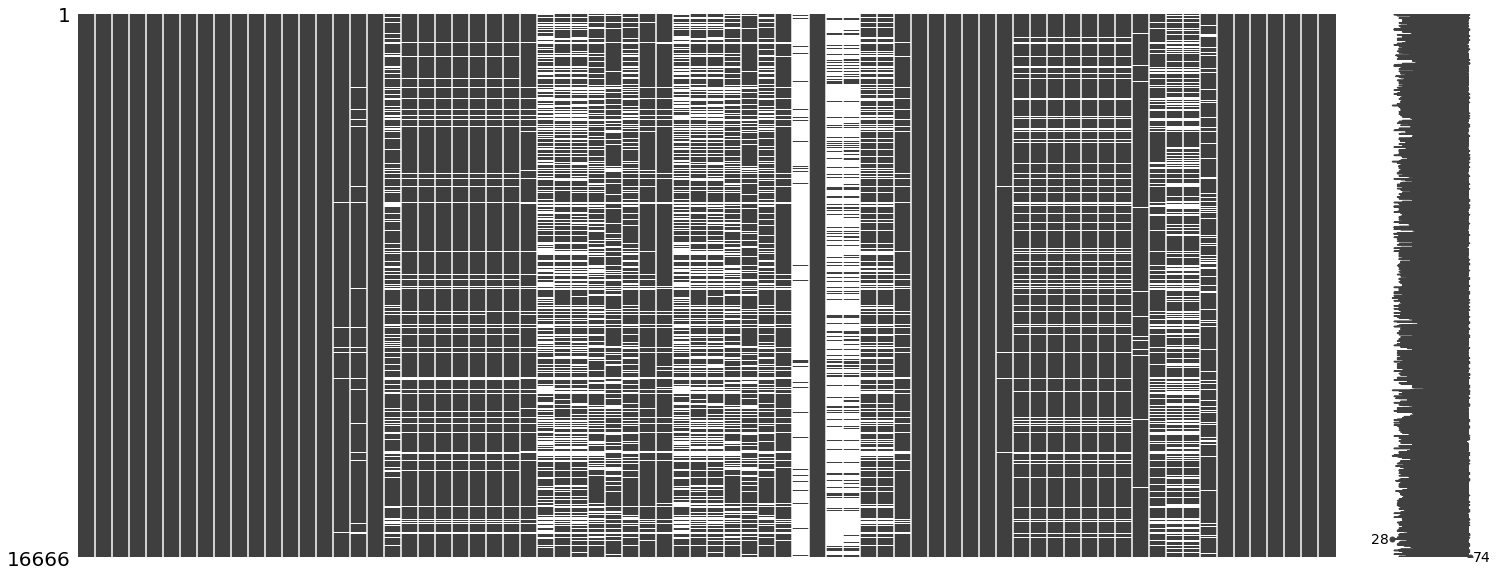

In [21]:
import missingno as msno
msno.matrix(df, figsize=(25, 10))

In [22]:
def get_missing_values(df):
    return {col: round((df[col].isna().sum())/len(df)*100, 1) for col in df.columns}

In [23]:
missing_values = get_missing_values(df)

In [24]:
missing_values

{'gemeentenaam': 0.0,
 'soort_regio': 0.0,
 'aantal_inwoners': 0.0,
 'stadsverwarming': 0.0,
 'mannen': 0.0,
 'vrouwen': 0.0,
 'k_0_tot_15_jaar': 0.0,
 'k_15_tot_25_jaar': 0.0,
 'k_25_tot_45_jaar': 0.0,
 'k_45_tot_65_jaar': 0.0,
 'k_65_jaar_of_ouder': 0.0,
 'huishoudens_totaal': 0.0,
 'eenpersoonshuishoudens': 0.0,
 'huishoudens_zonder_kinderen': 0.0,
 'huishoudens_met_kinderen': 0.0,
 'gemiddelde_huishoudensgrootte': 2.0,
 'bevolkingsdichtheid': 3.8,
 'woningvoorraad': 0.0,
 'gemiddelde_woningwaarde': 21.7,
 'koopwoningen': 9.3,
 'huurwoningen_totaal': 9.3,
 'in_bezit_woningcorporatie': 9.3,
 'in_bezit_overige_verhuurders': 9.3,
 'eigendom_onbekend': 9.3,
 'bouwjaar_voor_2000': 9.1,
 'bouwjaar_vanaf_2000': 9.1,
 'gemiddeld_elektriciteitsverbruik_totaal': 7.4,
 'elect_appartement': 43.4,
 'elect_tussenwoning': 34.8,
 'elect_hoekwoning': 36.4,
 'elect_twee_onder_een_kap_woning': 31.5,
 'elect_vrijstaande_woning': 22.3,
 'elect_huurwoning': 23.3,
 'elect_eigen_woning': 8.7,
 'gemiddeld_a

Based on the missing values, some features contain a lot of missing values. Therefore, we will drop them since imputation is not very effective and creates bias in the data.

A rule of thumb is dropping columns where the amount of missing values exceeds 30%. However, some valuable columns have over 30% missing values. Therefore we will not apply this rule of thumb blindly. 

In [25]:
for k,v in missing_values.items():
    if v > 30:
        print(k, v)

elect_appartement 43.4
elect_tussenwoning 34.8
elect_hoekwoning 36.4
elect_twee_onder_een_kap_woning 31.5
aard_appartement 44.8
aard_tussenwoning 36.2
aard_hoekwoning 37.6
aard_twee_onder_een_kap_woning 32.4
percentage_woningen_met_stadsverwarming 94.4
gemiddeld_inkomen_per_inkomensontvanger 79.8
gemiddeld_inkomen_per_inwoner 75.6
aantal_zonnepanelen_per_installatie 36.1
opgesteld_vermogen_van_zonnepanelen 36.1


Since EC-Energy sells solar panels, we will not drop the features regarding the solar panels.

### Sanity check

Apart from looking at the amount of NaN values. We will also look at data fault, such as zero values that indicate missing values.
For example, rows where the amount of inhabitant is less than 10.

In [26]:
df[abs(df['aantal_inwoners'])<10]

,gemeentenaam,soort_regio,aantal_inwoners,stadsverwarming,mannen,vrouwen,k_0_tot_15_jaar,k_15_tot_25_jaar,k_25_tot_45_jaar,k_45_tot_65_jaar,k_65_jaar_of_ouder,huishoudens_totaal,eenpersoonshuishoudens,huishoudens_zonder_kinderen,huishoudens_met_kinderen,gemiddelde_huishoudensgrootte,bevolkingsdichtheid,woningvoorraad,gemiddelde_woningwaarde,koopwoningen,huurwoningen_totaal,in_bezit_woningcorporatie,in_bezit_overige_verhuurders,eigendom_onbekend,bouwjaar_voor_2000,bouwjaar_vanaf_2000,gemiddeld_elektriciteitsverbruik_totaal,elect_appartement,elect_tussenwoning,elect_hoekwoning,elect_twee_onder_een_kap_woning,elect_vrijstaande_woning,elect_huurwoning,elect_eigen_woning,gemiddeld_aardgasverbruik_totaal,aard_appartement,aard_tussenwoning,aard_hoekwoning,aard_twee_onder_een_kap_woning,aard_vrijstaande_woning,aard_huurwoning,aard_eigen_woning,percentage_woningen_met_stadsverwarming,aantal_inkomensontvangers,gemiddeld_inkomen_per_inkomensontvanger,gemiddeld_inkomen_per_inwoner,k_40_huishoudens_met_laagste_inkomen,k_20_huishoudens_met_hoogste_inkomen,personen_per_soort_uitkering_bijstand,personenautos_brandstof_benzine,personenautos_overige_brandstof,oppervlakte_land,mate_van_stedelijkheid,omgevingsadressendichtheid,bedrijfsvestigingen_totaal,type_a_landbouw_bosbouw_visserij,type_bf_nijverheid_energie,type_gi_handel_horeca,type_hj_vervoer_informatie_communicatie,type_kl_financiele_diensten_onroerendgoed,type_mn_zakelijke_dienstverlening,type_ru_cultuur_recreatie_overige_diensten,indelingswijziging_wijken_en_buurten,aantal_installaties_bij_woningen,aantal_zonnepanelen_per_installatie,opgesteld_vermogen_van_zonnepanelen,totaal_aantal_laadpalen,werkloosheidsuitkering_relatief,bijstandsuitkering_relatief,arbeidsongeschiktheidsuitkering_relatief,aow_uitkering_relatief,inwoners_vanaf_15_jaar,inwoners_vanaf_15_jr_tot_aow_leeftijd,inwoners_vanaf_de_aow_leeftijd
8,Steenwijkerland,Buurt,9.0,0.0,5.0,5.0,0.0,0.0,0.0,5.0,0.0,5.0,0.0,5.0,0.0,18.0,NaN,10.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3240.0,NaN,NaN,NaN,NaN,3510.0,NaN,3200.0,1790.0,NaN,NaN,NaN,NaN,1860.0,NaN,1780.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,5.0,0.0,112.0,5.0,6.0,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,40.0,0.0,0.0
22,AaenHunze,Buurt,8.0,0.0,5.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,40.0,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,5.0,0.0,878.0,5.0,84.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,40.0,40.0,0.0
27,Tilburg,Buurt,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,0.0,0.0,57.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
57,Barendrecht,Buurt,5.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,5.0,0.0,0.0,5.0,5.0,25.0,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,0.0,0.0,20.0,5.0,404.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,10.0,0.0,0.0
73,'s-Hertogenbosch,Buurt,-5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,25.0,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,10.0,40.0,-68.0,4.0,658.0,25.0,0.0,5.0,10.0,0.0,0.0,10.0,0.0,1.0,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16557,Brunssum,Buurt,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,20.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,0.0,0.0,137.0,5.0,16

These rows will be dropped as a whole.

In [27]:
def drop_rows(df):
    return df.drop(df[abs(df['aantal_inwoners'])<10].index)

In [28]:
df = drop_rows(df)

In [29]:
def drop_missing_values_columns(df):
    cols = ['elect_appartement',
            'elect_tussenwoning',
            'elect_hoekwoning',
            'elect_twee_onder_een_kap_woning',
            'aard_appartement',
            'aard_tussenwoning',
            'aard_hoekwoning',
            'aard_twee_onder_een_kap_woning',
            'percentage_woningen_met_stadsverwarming',
            'gemiddeld_inkomen_per_inkomensontvanger',
            'gemiddeld_inkomen_per_inwoner']

    return df.drop(columns=list(cols))

In [30]:
df = drop_missing_values_columns(df)

In [31]:
df

,gemeentenaam,soort_regio,aantal_inwoners,stadsverwarming,mannen,vrouwen,k_0_tot_15_jaar,k_15_tot_25_jaar,k_25_tot_45_jaar,k_45_tot_65_jaar,k_65_jaar_of_ouder,huishoudens_totaal,eenpersoonshuishoudens,huishoudens_zonder_kinderen,huishoudens_met_kinderen,gemiddelde_huishoudensgrootte,bevolkingsdichtheid,woningvoorraad,gemiddelde_woningwaarde,koopwoningen,huurwoningen_totaal,in_bezit_woningcorporatie,in_bezit_overige_verhuurders,eigendom_onbekend,bouwjaar_voor_2000,bouwjaar_vanaf_2000,gemiddeld_elektriciteitsverbruik_totaal,elect_vrijstaande_woning,elect_huurwoning,elect_eigen_woning,gemiddeld_aardgasverbruik_totaal,aard_vrijstaande_woning,aard_huurwoning,aard_eigen_woning,aantal_inkomensontvangers,k_40_huishoudens_met_laagste_inkomen,k_20_huishoudens_met_hoogste_inkomen,personen_per_soort_uitkering_bijstand,personenautos_brandstof_benzine,personenautos_overige_brandstof,oppervlakte_land,mate_van_stedelijkheid,omgevingsadressendichtheid,bedrijfsvestigingen_totaal,type_a_landbouw_bosbouw_visserij,type_bf_nijverheid_energie,type_gi_handel_horeca,type_hj_vervoer_informatie_communicatie,type_kl_financiele_diensten_onroerendgoed,type_mn_zakelijke_dienstverlening,type_ru_cultuur_recreatie_overige_diensten,indelingswijziging_wijken_en_buurten,aantal_installaties_bij_woningen,aantal_zonnepanelen_per_installatie,opgesteld_vermogen_van_zonnepanelen,totaal_aantal_laadpalen,werkloosheidsuitkering_relatief,bijstandsuitkering_relatief,arbeidsongeschiktheidsuitkering_relatief,aow_uitkering_relatief,inwoners_vanaf_15_jaar,inwoners_vanaf_15_jr_tot_aow_leeftijd,inwoners_vanaf_de_aow_leeftijd
0,LoonopZand,Buurt,222.0,0.0,110.0,110.0,35.0,30.0,40.0,70.0,45.0,80.0,15.0,35.0,35.0,26.0,26.0,92.0,425.0,90.0,8.0,0.0,8.0,2.0,74.0,26.0,4680.0,5420.0,NaN,4550.0,2350.0,2860.0,NaN,2190.0,200.0,NaN,NaN,0.0,90.0,35.0,856.0,5.0,235.0,35.0,10.0,5.0,10.0,0.0,5.0,5.0,0.0,1.0,10.0,26.0,60.0,0.0,90.0,20.0,155.0,930.0,800.0,630.0,200.0
1,Dordrecht,Buurt,1046.0,0.0,535.0,505.0,200.0,155.0,285.0,290.0,115.0,450.0,175.0,95.0,190.0,23.0,5979.0,437.0,131.0,24.0,76.0,71.0,5.0,0.0,91.0,9.0,2470.0,NaN,2220.0,3280.0,840.0,NaN,790.0,980.0,800.0,607.0,76.0,110.0,235.0,70.0,17.0,1.0,2972.0,50.0,0.0,5.0,10.0,10.0,5.0,5.0,15.0,1.0,NaN,NaN,NaN,0.0,90.0,485.0,455.0,520.0,3380.0,2950.0,440.0
2,hetBildt,Wijk,-1677.0,0.0,885.0,790.0,290.0,205.0,365.0,560.0,255.0,725.0,240.0,225.0,260.0,23.0,59.0,750.0,139.0,76.0,23.0,15.0,8.0,1.0,94.0,6.0,2690.0,2930.0,1990.0,2900.0,1600.0,1770.0,1330.0,1690.0,1300.0,363.0,163.0,30.0,640.0,240.0,-2843.0,5.0,80.0,180.0,40.0,30.0,35.0,15.0,10.0,35.0,25.0,1.0,70.0,18.0,278.0,2.0,125.0,80.0,185.0,710.0,5570.0,4560.0,1000.0
3,Oudewater,Buurt,134.0,0.0,70.0,60.0,25.0,20.0,25.0,50.0,10.0,45.0,10.0,15.0,25.0,30.0,436.0,49.0,NaN,84.0,14.0,0.0,14.0,2.0,61.0,39.0,5120.0,5450.0,NaN,4830.0,2210.0,2410.0,NaN,2050.0,100.0,NaN,NaN,0.0,90.0,85.0,31.0,4.0,535.0,120.0,0.0,40.0,45.0,10.0,20.0,5.0,0.0,1.0,6.0,11.0,14.0,1.0,10.0,0.0,40.0,375.0,440.0,400.0,40.0
4,Heerlen,Buurt,340.0,0.0,150.0,185.0,20.0,25.0,55.0,90.0,140.0,255.0,195.0,35.0,25.0,13.0,1542.0,271.0,81.0,11.0,66.0,30.0,37.0,23.0,100.0,0.0,2040.0,NaN,2120.0,1940.0,930.0,NaN,960.0,930.0,300.0,879.0,0.0,30.0,90.0,5.0,22.0,2.0,1763.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,0.0,55.0,445.0,445.0,1690.0,1280.0,740.0,540.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16661,Leudal,Wijk,943.0,0.0,510.0,440.0,140.0,120.0,185.0,320.0,175.0,395.0,115.0,130.0,155.0,24.0,232.0,401.0,219.0,79.0,21.0,13.0,8.0,0.0,91.0,9.0,3660.0,4150.0,2680.0,3930.0,1770.0,2080.0,1410.0,1870.0,800.0,305.0,228.0,10.0,450.0,100.0,406.0,5.0,193.0,75.0,10.0,20.0,15.0,5.0,5.0,15.0,10.0,1.0,33.0,20.0,150.0,1.0,55.0,55.0,225.0,850.0,3220.0,2530.0,690.0
16662,Steenwijkerland,Buurt,-47.0,0.0,25.0,25.0,5.0,10.0,10.0,5.0,10.0,10.0,0.0,0.0,1

# Distributions of the features

In [32]:
from navara.plots.plots import create_distplots, plot_correlation_heatmap

In [33]:
df.describe()

,aantal_inwoners,stadsverwarming,mannen,vrouwen,k_0_tot_15_jaar,k_15_tot_25_jaar,k_25_tot_45_jaar,k_45_tot_65_jaar,k_65_jaar_of_ouder,huishoudens_totaal,eenpersoonshuishoudens,huishoudens_zonder_kinderen,huishoudens_met_kinderen,gemiddelde_huishoudensgrootte,bevolkingsdichtheid,woningvoorraad,gemiddelde_woningwaarde,koopwoningen,huurwoningen_totaal,in_bezit_woningcorporatie,in_bezit_overige_verhuurders,eigendom_onbekend,bouwjaar_voor_2000,bouwjaar_vanaf_2000,gemiddeld_elektriciteitsverbruik_totaal,elect_vrijstaande_woning,elect_huurwoning,elect_eigen_woning,gemiddeld_aardgasverbruik_totaal,aard_vrijstaande_woning,aard_huurwoning,aard_eigen_woning,aantal_inkomensontvangers,k_40_huishoudens_met_laagste_inkomen,k_20_huishoudens_met_hoogste_inkomen,personen_per_soort_uitkering_bijstand,personenautos_brandstof_benzine,personenautos_overige_brandstof,oppervlakte_land,mate_van_stedelijkheid,omgevingsadressendichtheid,bedrijfsvestigingen_totaal,type_a_landbouw_bosbouw_visserij,type_bf_nijverheid_energie,type_gi_handel_horeca,type_hj_vervoer_informatie_communicatie,type_kl_financiele_diensten_onroerendgoed,type_mn_zakelijke_dienstverlening,type_ru_cultuur_recreatie_overige_diensten,indelingswijziging_wijken_en_buurten,aantal_installaties_bij_woningen,aantal_zonnepanelen_per_installatie,opgesteld_vermogen_van_zonnepanelen,totaal_aantal_laadpalen,werkloosheidsuitkering_relatief,bijstandsuitkering_relatief,arbeidsongeschiktheidsuitkering_relatief,aow_uitkering_relatief,inwoners_vanaf_15_jaar,inwoners_vanaf_15_jr_tot_aow_leeftijd,inwoners_vanaf_de_aow_leeftijd
count,16038.000000,16038.000000,16038.000000,16038.000000,16038.000000,16038.000000,16038.000000,16038.000000,16038.000000,16038.000000,16038.000000,16038.000000,16038.000000,16028.000000,16038.000000,16038.000000,13051.000000,15121.000000,15121.000000,15121.000000,15121.000000,15121.000000,15143.000000,15143.000000,15430.000000,12952.000000,12787.000000,15207.000000,15192.000000,12824.000000,12561.000000,14963.000000,16038.000000,12285.000000,12285.000000,15200.000000,16038.000000,16038.000000,16038.000000,16037.000000,16037.000000,15990.000000,14115.000000,14115.000000,14115.000000,14115.000000,14115.000000,14115.000000,14115.000000,15650.000000,13319.000000,10653.000000,10653.000000,14070.000000,16038.000000,16038.000000,16038.000000,16038.000000,1.603800e+04,1.603800e+04,16038.000000
mean,1965.594027,26.685435,1584.474810,1609.074074,520.271418,393.060731,788.198404,902.284262,590.992331,1456.382030,553.942699,420.440267,483.751465,23.157911,2799.068088,1437.639793,246.532833,66.607433,32.148932,19.122942,13.021493,1.227234,84.945982,15.058641,3326.104342,4164.041075,2517.946352,3582.352206,1622.295287,2277.086712,1306.008280,1724.248480,2503.148772,350.090191,234.610338,93.075658,1201.382654,286.966891,388.362701,3.607907,1177.191931,281.636648,15.379384,48.536663,68.386823,27.155154,31.898335,83.851576,42.086433,1.138019,116.430963,16.750587,358.594105,2.296304,75.895373,82.784013,181.175957,828.190859,1.075116e+04,8.465158e+03,2287.839506
std,13280.925044,136.514050,6451.403627,6589.770008,2114.496644,1741.086732,3936.773031,3393.588902,2031.151237,6522.889647,3178.055923,1555.123916,1908.769694,4.036454,3844.413261,6199.341537,108.621547,20.928177,20.624696,19.948619,11.870131,3.156094,20.506542,20.507010,834.104006,744.114731,658.794556,755.305552,551.304941,491.133104,503.270328,527.329126,10128.526947,152.078460,120.817689,628.573846,4187.624563,1571.273259,1987.496527,1.474962,1483.007575,1347.625373,49.910500,168.487329,279.150614,170.087800,133.616807,451.872855,243.991448,0.503542,325.832852,11.446230,953.603609,9.859709,37.449217,116.227596,157.441056,402.977185,4.400264e+04,3.644878e+04,7837.344964
min,-226868.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,10.000000,0.000000,0.000000,53.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,700.000000,940.000000,680.000000,470.000000,1

Apart from the distributions, there seems to be negative values for some features that indicate data errors. Therefore, we will first make these values absolute before evaluating the distributions.

In [34]:
df = df.apply(lambda d: d.abs() if np.issubdtype(d.dtype, np.number) else d)

/Users/nielshoogeveen/Desktop/Projects/Navara/venv/lib/python3.7/site-packages/seaborn/distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
/Users/nielshoogeveen/Desktop/Projects/Navara/venv/lib/python3.7/site-packages/seaborn/distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


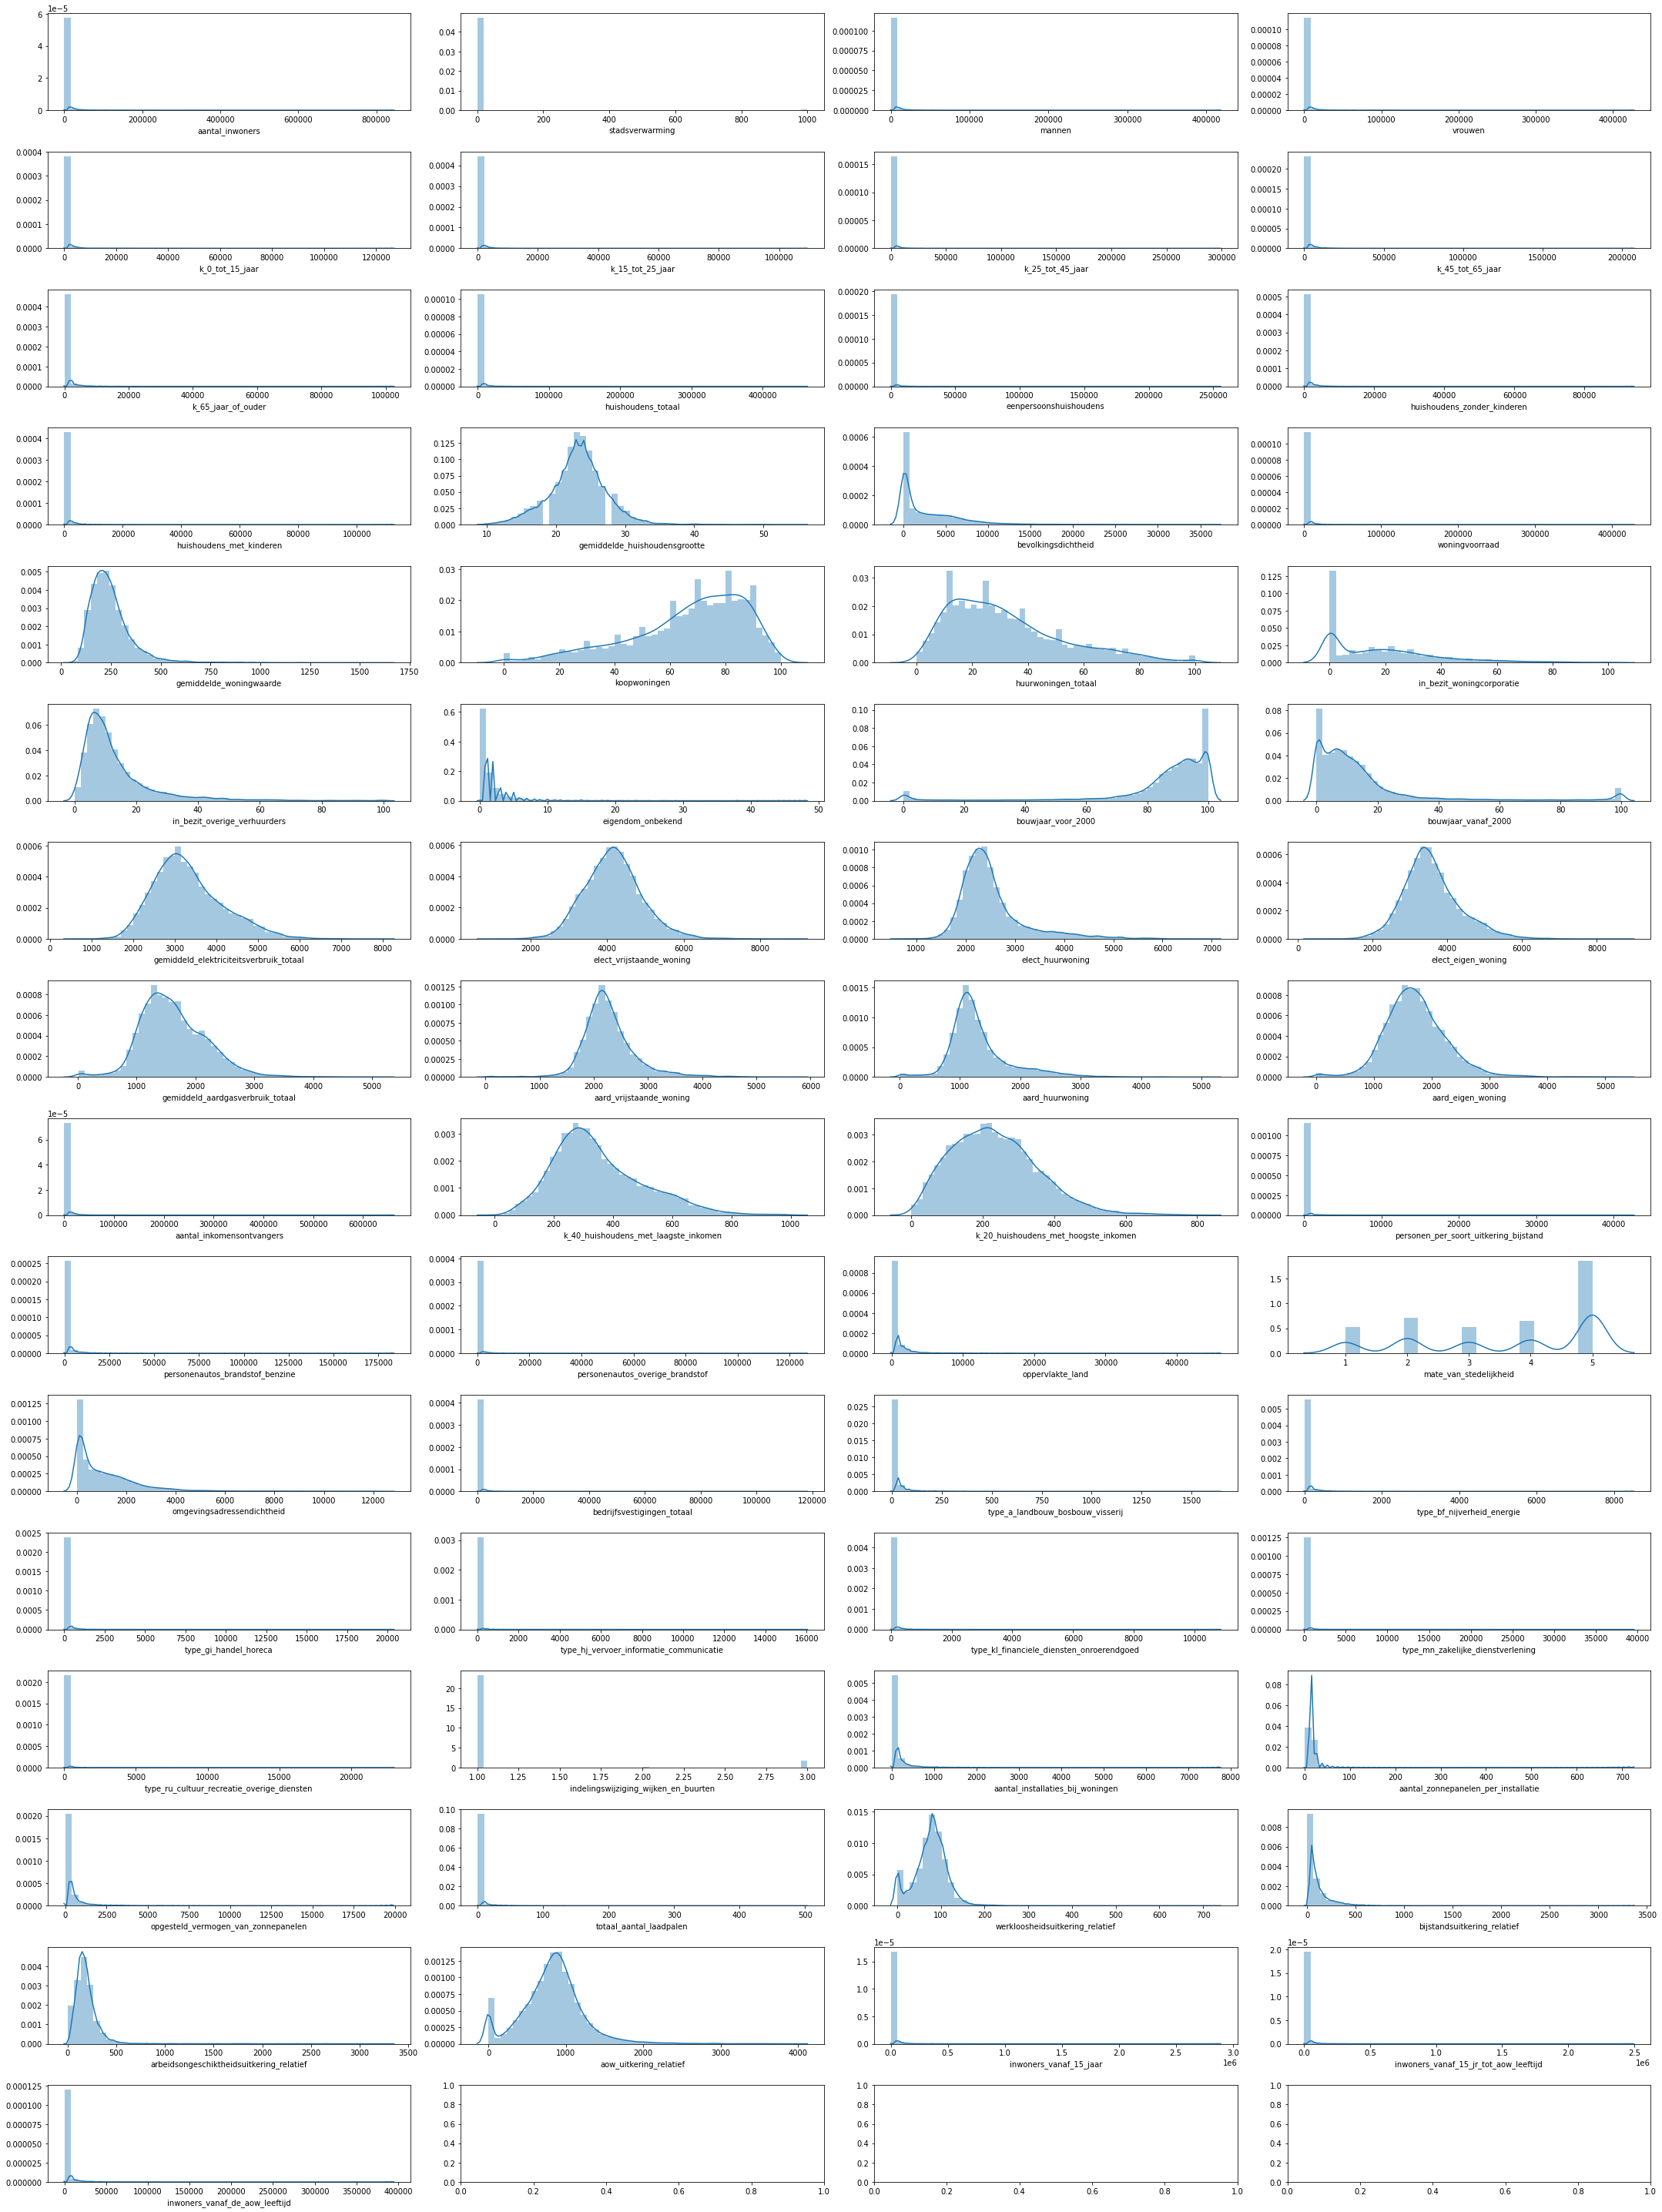

In [35]:
create_distplots(df)

As can be seen from the distribution plots, a lot of features are heavily (right) skewed. Since we want to use K-Means to cluster customer segmentations, one of the assumptions is a symmetric distribution of the features. Therefore, we will log-transform the features first. 

In [36]:
def transform_skewed_data(df):
    """
    This function transforms certain columns to create a more normal or symmetric distribution.
    :param df: dataframe
    :return: dataframe
    """
    return df.assign(
        aantal_inwoners = lambda d: np.log1p(d['aantal_inwoners']),
        stadsverwarming=lambda d: np.log1p(d['stadsverwarming']),
        mannen=lambda d: np.log1p(d['mannen']),
        vrouwen=lambda d: np.log1p(d['vrouwen']),
        k_0_tot_15_jaar=lambda d: np.log1p(d['k_0_tot_15_jaar']),
        k_15_tot_25_jaar=lambda d: np.log1p(d['k_15_tot_25_jaar']),
        k_25_tot_45_jaar=lambda d: np.log1p(d['k_25_tot_45_jaar']),
        k_45_tot_65_jaar=lambda d: np.log1p(d['k_45_tot_65_jaar']),
        k_65_jaar_of_ouder=lambda d: np.log1p(d['k_65_jaar_of_ouder']),
        huishoudens_totaal=lambda d: np.log1p(d['huishoudens_totaal']),
        eenpersoonshuishoudens=lambda d: np.log1p(d['eenpersoonshuishoudens']),
        huishoudens_zonder_kinderen=lambda d: np.log1p(d['huishoudens_zonder_kinderen']),
        huishoudens_met_kinderen=lambda d: np.log1p(d['huishoudens_met_kinderen']),
        gemiddelde_huishoudensgrootte=lambda d: np.log(d['gemiddelde_huishoudensgrootte']),
        bevolkingsdichtheid=lambda d: np.log1p(d['bevolkingsdichtheid']),
        woningvoorraad=lambda d: np.log1p(d['woningvoorraad']),
        gemiddelde_woningwaarde=lambda d: np.log(d['gemiddelde_woningwaarde']),
        in_bezit_woningcorporatie=lambda d: np.log1p(d['in_bezit_woningcorporatie']),
        in_bezit_overige_verhuurders=lambda d: np.log1p(d['in_bezit_overige_verhuurders']),
        eigendom_onbekend=lambda d: np.log1p(d['eigendom_onbekend']),
        bouwjaar_voor_2000=lambda d: np.log((d['bouwjaar_voor_2000'].max()+1) - d['bouwjaar_voor_2000']),
        bouwjaar_vanaf_2000=lambda d: np.log1p(d['bouwjaar_vanaf_2000']),
        gemiddeld_elektriciteitsverbruik_totaal=lambda d: np.sqrt(d['gemiddeld_elektriciteitsverbruik_totaal']),
        elect_huurwoning=lambda d: np.log(d['elect_huurwoning']),
        gemiddeld_aardgasverbruik_totaal=lambda d: np.sqrt(d['gemiddeld_aardgasverbruik_totaal']),
        aantal_inkomensontvangers=lambda d: np.log1p(d['aantal_inkomensontvangers']),
        k_40_huishoudens_met_laagste_inkomen=lambda d: np.sqrt(d['k_40_huishoudens_met_laagste_inkomen']),
        k_20_huishoudens_met_hoogste_inkomen=lambda d: np.sqrt(d['k_20_huishoudens_met_hoogste_inkomen']),
        personen_per_soort_uitkering_bijstand=lambda d: np.log1p(d['personen_per_soort_uitkering_bijstand']),
        personenautos_brandstof_benzine=lambda d: np.log1p(d['personenautos_brandstof_benzine']),
        personenautos_overige_brandstof=lambda d: np.log1p(d['personenautos_overige_brandstof']),
        oppervlakte_land=lambda d: np.log1p(d['oppervlakte_land']),
        omgevingsadressendichtheid=lambda d: np.log1p(d['omgevingsadressendichtheid']),
        bedrijfsvestigingen_totaal=lambda d: np.log1p(d['bedrijfsvestigingen_totaal']),
        type_a_landbouw_bosbouw_visserij=lambda d: np.log1p(d['type_a_landbouw_bosbouw_visserij']),
        type_bf_nijverheid_energie=lambda d: np.log1p(d['type_bf_nijverheid_energie']),
        type_gi_handel_horeca=lambda d: np.log1p(d['type_gi_handel_horeca']),
        type_hj_vervoer_informatie_communicatie=lambda d: np.log1p(d['type_hj_vervoer_informatie_communicatie']),
        type_kl_financiele_diensten_onroerendgoed=lambda d: np.log1p(d['type_kl_financiele_diensten_onroerendgoed']),
        type_mn_zakelijke_dienstverlening=lambda d: np.log1p(d['type_mn_zakelijke_dienstverlening']),
        type_ru_cultuur_recreatie_overige_diensten=lambda d: np.log1p(d['type_ru_cultuur_recreatie_overige_diensten']),
        aantal_installaties_bij_woningen=lambda d: np.log1p(d['aantal_installaties_bij_woningen']),
        aantal_zonnepanelen_per_installatie=lambda d: np.log1p(d['aantal_zonnepanelen_per_installatie']),
        opgesteld_vermogen_van_zonnepanelen=lambda d: np.log1p(d['opgesteld_vermogen_van_zonnepanelen']),
        totaal_aantal_laadpalen=lambda d: np.log1p(d['totaal_aantal_laadpalen']),
        werkloosheidsuitkering_relatief=lambda d: np.log1p(d['werkloosheidsuitkering_relatief']),
        bijstandsuitkering_relatief=lambda d: np.log1p(d['bijstandsuitkering_relatief']),
        arbeidsongeschiktheidsuitkering_relatief=lambda d: np.log1p(d['arbeidsongeschiktheidsuitkering_relatief']),
        inwoners_vanaf_15_jaar=lambda d: np.log1p(d['inwoners_vanaf_15_jaar']),
        inwoners_vanaf_15_jr_tot_aow_leeftijd=lambda d: np.log1p(d['inwoners_vanaf_15_jr_tot_aow_leeftijd']),
        inwoners_vanaf_de_aow_leeftijd=lambda d: np.log1p(d['inwoners_vanaf_de_aow_leeftijd'])
    )

In [37]:
df = transform_skewed_data(df)

/Users/nielshoogeveen/Desktop/Projects/Navara/venv/lib/python3.7/site-packages/seaborn/distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
/Users/nielshoogeveen/Desktop/Projects/Navara/venv/lib/python3.7/site-packages/seaborn/distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


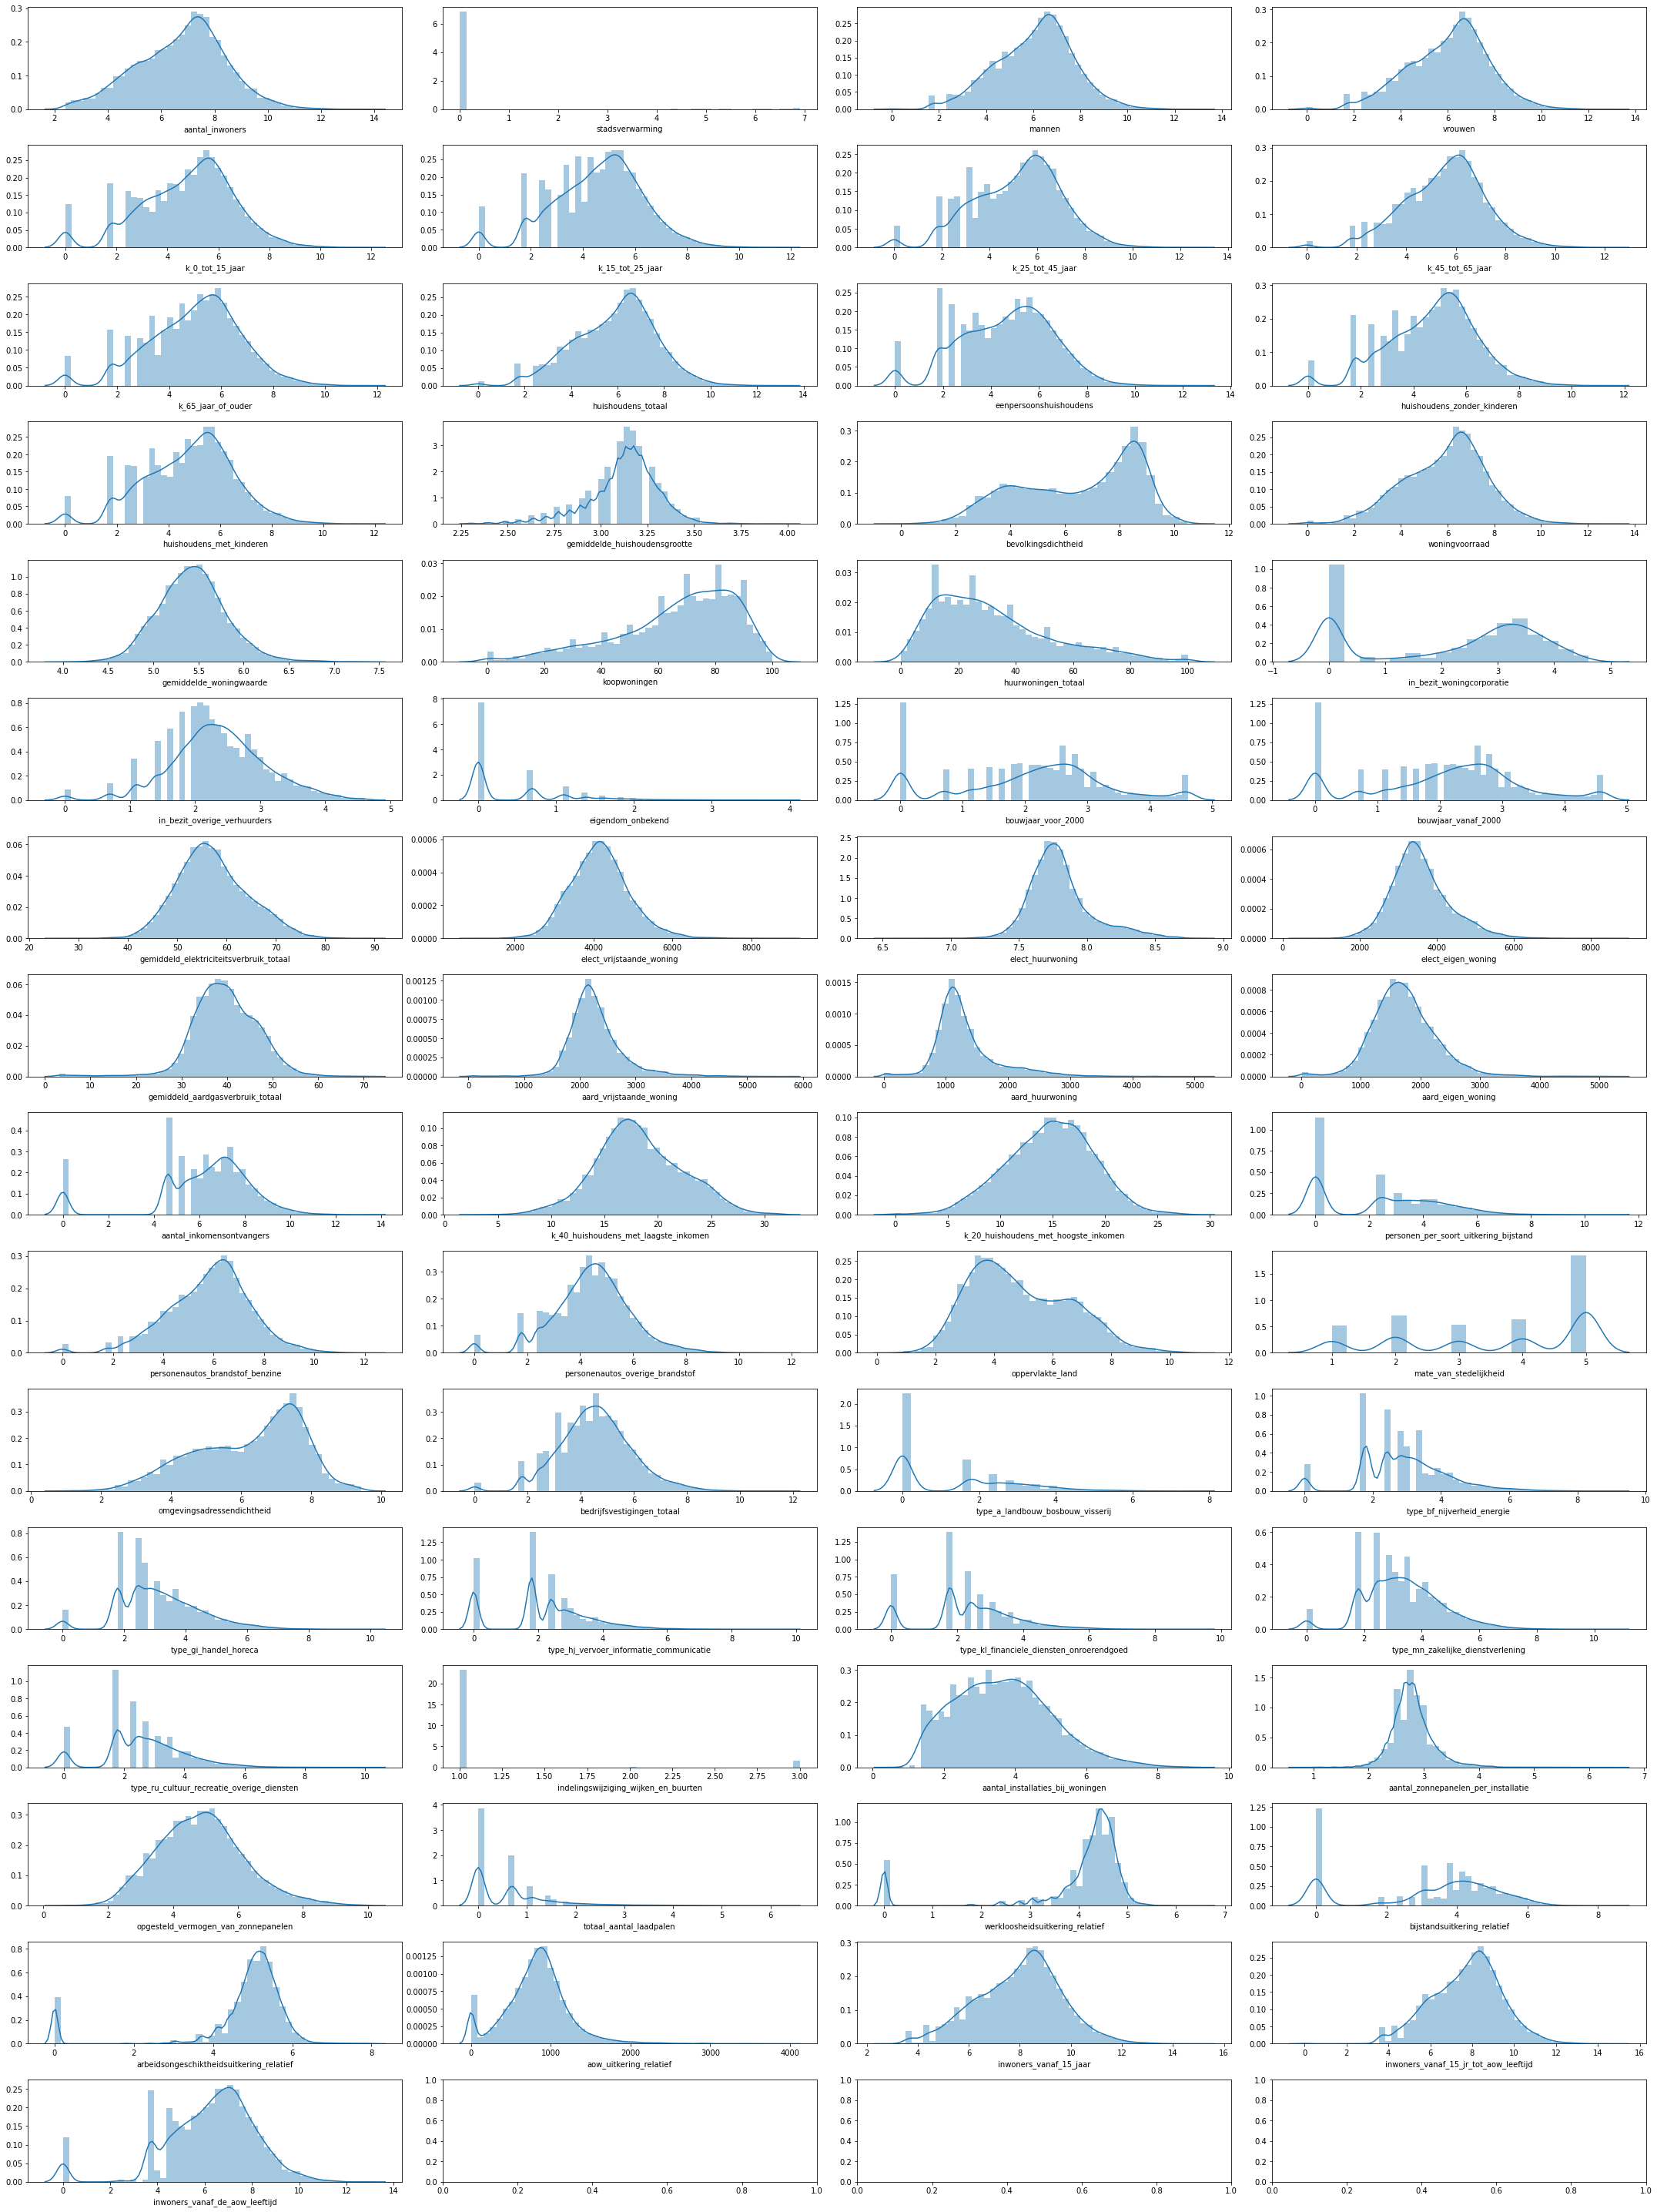

In [38]:
create_distplots(df)

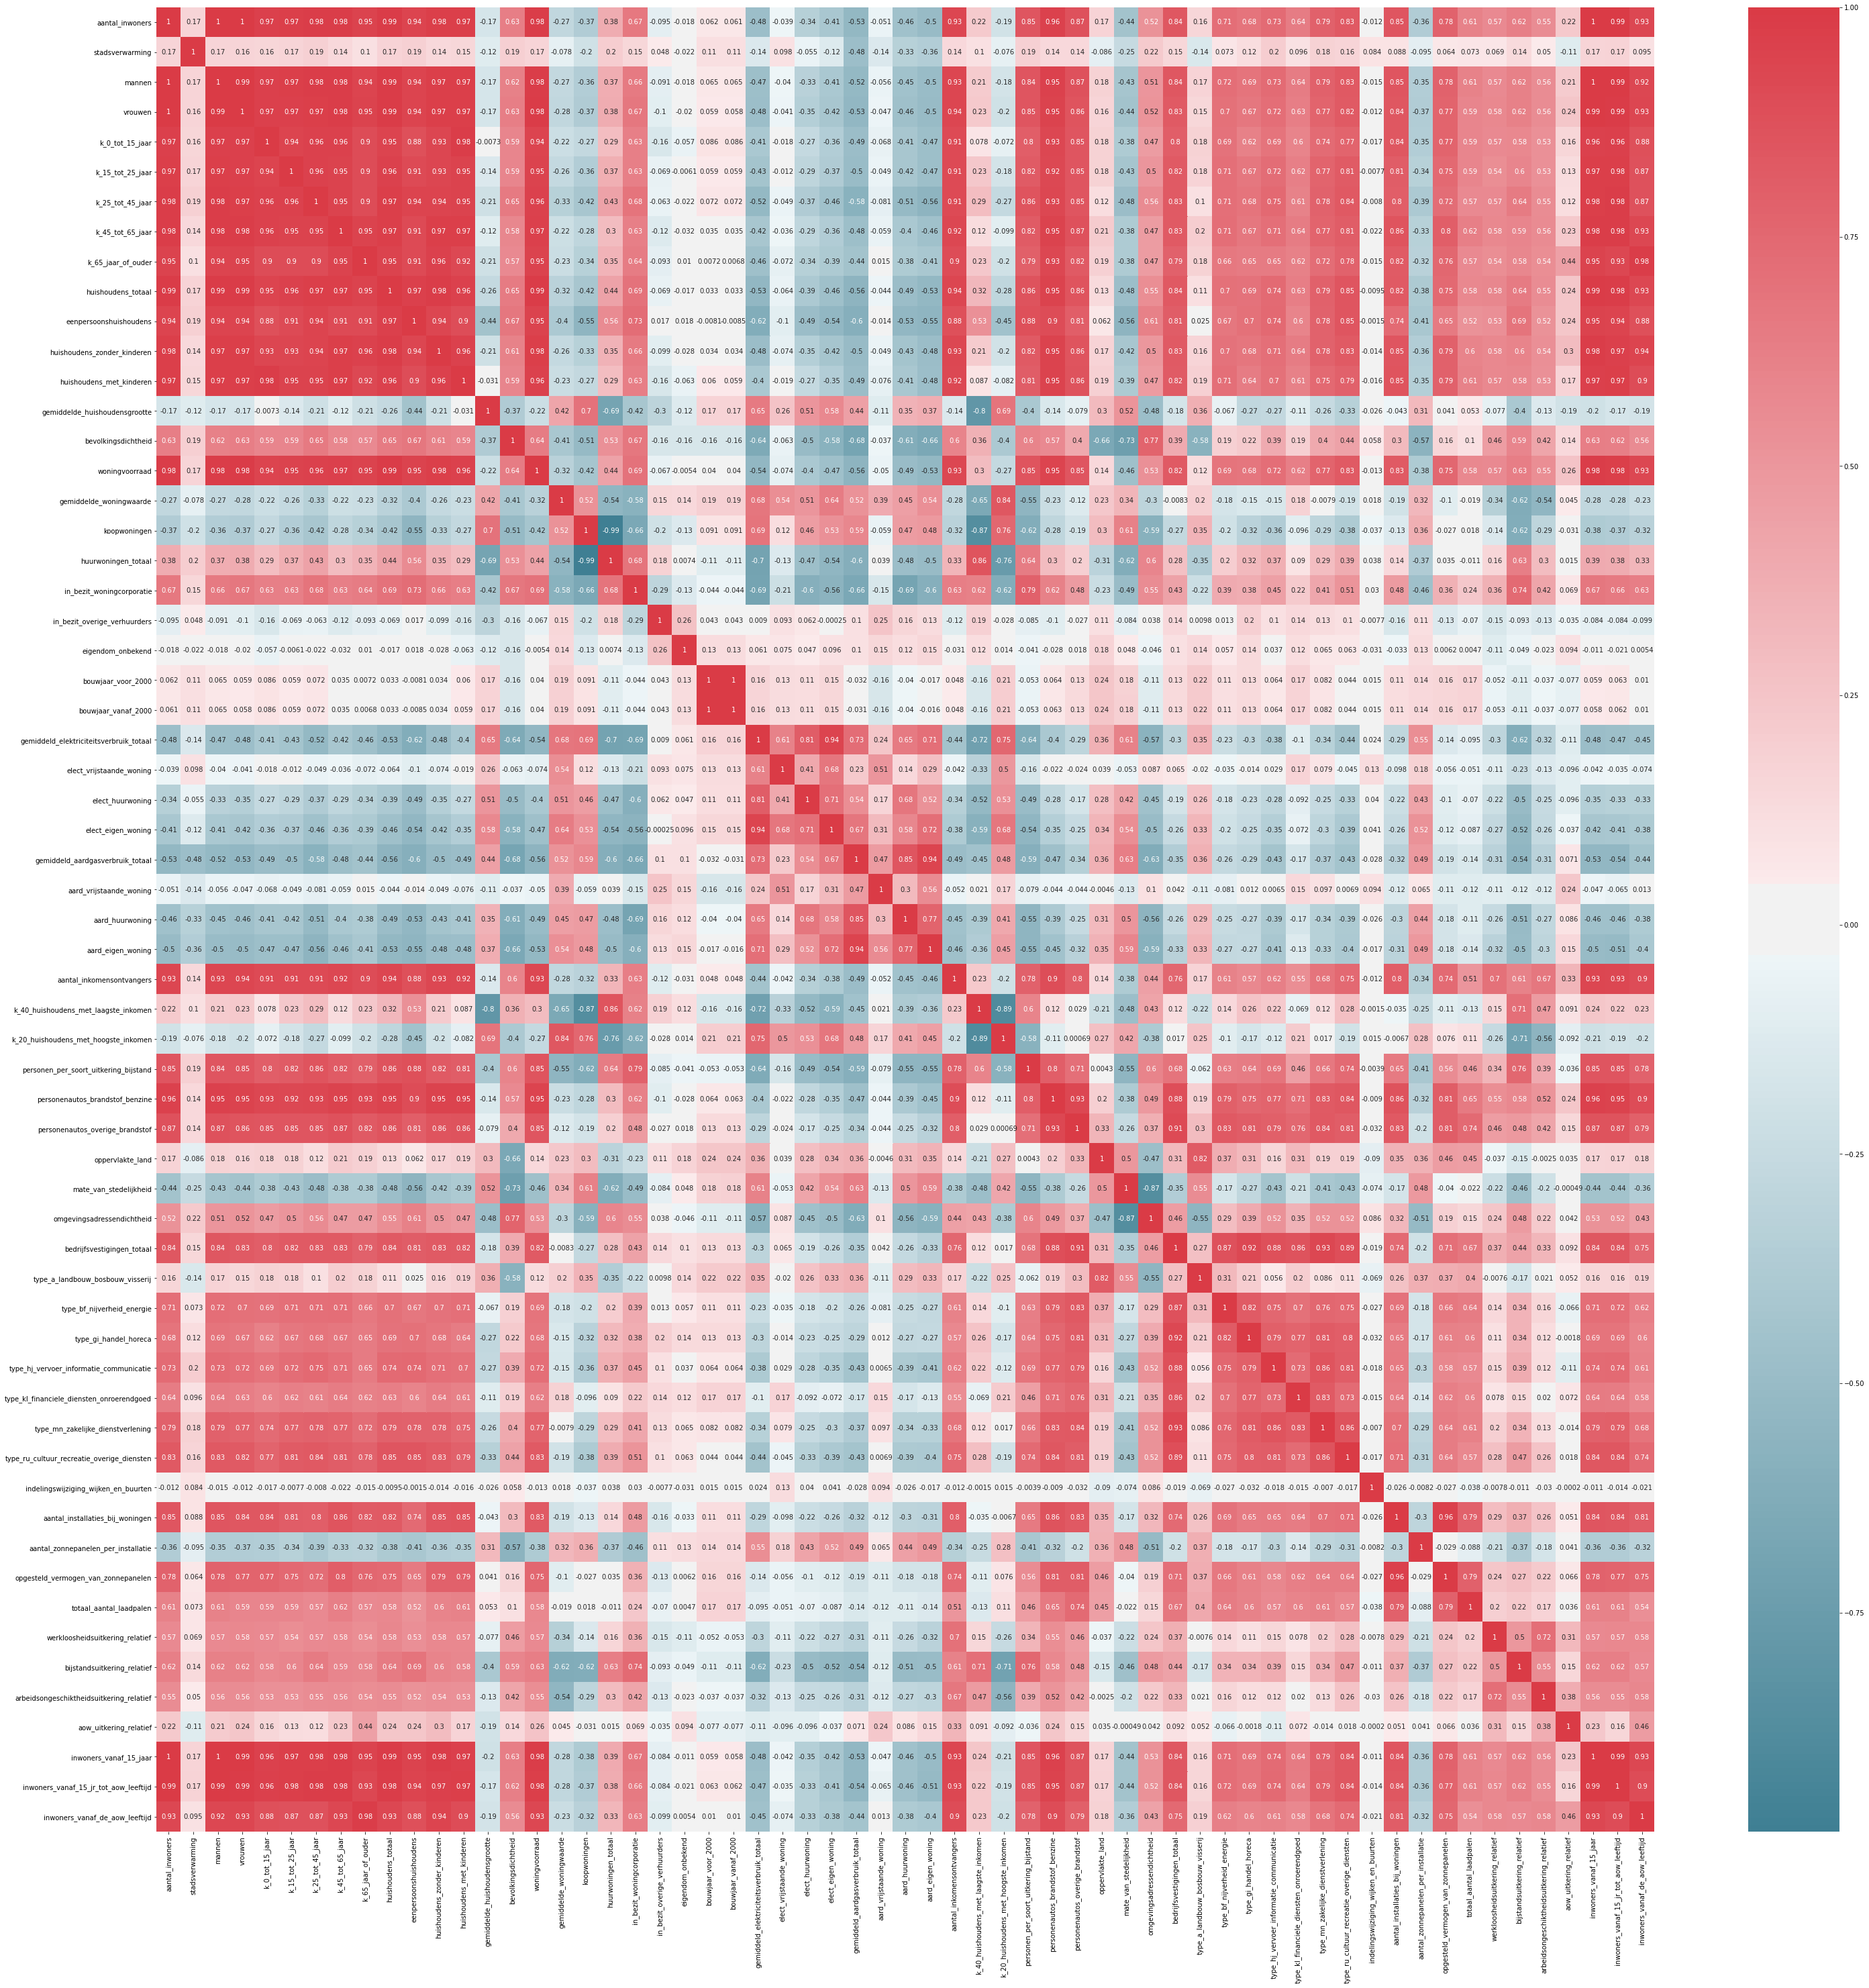

In [39]:
plot_correlation_heatmap(df)

From the correlation heatmap, it can be concluded that a lot of features highly correlate among each other (i.e. multi-collinearity). We will drop the correlated features in the machine learning pipeline with a custom Scikit-learn transformer.

## Categorical features

In [40]:
df['gemeentenaam'].nunique()

388

There are two features that contain categories: 'gemeentenaam' and 'soort_regio'. Since there are a lot of unique categories (high cardinality) and combinations, we will need feature hashing since one-hot-encoding will lead to a very sparse matrix and therefore introduces curse of dimensionality.

However, we need to find the optimal number of features that minimizes the number of collisions. 

### Feature hashing
HashingEncoder implements the hashing trick. It is similar to one-hot encoding but with fewer new dimensions and some info loss due to collisions. The collisions do not significantly affect performance unless there is a great deal of overlap.

In [41]:
# Determine n_features to minimize collisions
# 1: Find the number unique combination of values, u for the categorical variables

# Get all combinations of categorical features for categorical vector size
def get_combinations(df, *cols):
    combinations = []
    for col in cols:
        combinations.append(df[col].nunique())
        
    return np.prod(combinations)
    
# 2: Choose the smallest n such C(n,m) is less than u where C(n,m) is combination defined as n!/(m! x (n-m)!)
# m is categorical size vector (amount of categorical features)
import math

def nCr(n,r):
    f = math.factorial
    return round(f(n) / f(r) / f(n-r))

In [42]:
get_combinations(df, 'gemeentenaam', 'soort_regio')

1164

In [43]:
nCr(48,2)

1128

We will use 48 features in our feature hashing to minimize the collisions, but maintain the number of features as low as possible.